## Machine Learning landscape

In [55]:
# To support both python 2 and python 3
from __future__ import division,print_function, unicode_literals

#common import 
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

#To plot pretty figures
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#Where to save figure
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [45]:
# Code example
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
    oecd_bli = oecd_bli.pivot(index ='Country', columns='Indicator', values='Value')
    gdp_per_capita.rename(columns={'2015':'GDP per capita'},inplace=True)
    gdp_per_capita.set_index('Country', inplace=True)
    full_country_stats = pd.merge(left = oecd_bli, right=gdp_per_capita,
                                 left_index= True, right_index=True)
    full_country_stats.sort_values(by='GDP per capita',inplace=True)
    remove_indices = [0,1,6,8,33,34,35]
    keep_indices = list(set(range(36))- set(remove_indices))
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

In [46]:
import os
datapath = os.path.join('datasets','lifesat','')

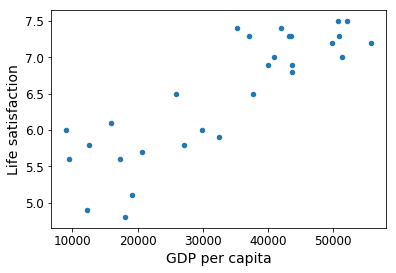

[[5.96242338]]


In [47]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

#load the data
oecd_bli = pd.read_csv(datapath + 'oecd_bli_2015.csv',thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli,gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

# Visualize the data
country_stats.plot(kind='scatter', x='GDP per capita',y='Life satisfaction')
plt.show()

# Slect a linear model
model = sklearn.linear_model.LinearRegression()

#Train the model
model.fit(X, y)

#Make a prediction for Cyprus
X_new = [[22587]] # Cyprus 'GDP per capita'
print(model.predict(X_new))

In [48]:
# Load and fprepare Life satisfaction data
oecd_bli = pd.read_csv(datapath + 'oecd_bli_2015.csv', thousands=',')
oecd_bli = oecd_bli[oecd_bli['INEQUALITY']=='TOT']
oecd_bli = oecd_bli.pivot(index='Country',columns='Indicator',values='Value')
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [49]:
oecd_bli['Life satisfaction'].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

In [50]:
# Load and prepare GDP per capita data
gdp_per_capita = pd.read_csv(datapath + 'gdp_per_capita.csv',thousands=',',delimiter='\t',
                            encoding='latin1',na_values='n/a')
gdp_per_capita.rename(columns={'2015':'GDP per capita'},inplace=True)
gdp_per_capita.set_index('Country', inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [51]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,left_index=True, right_index=True)
full_country_stats.sort_values(by='GDP per capita', inplace=True)
full_country_stats.tail()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,16.06,88.0,94.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",52114.165,2015.0
United States,18.0,1.5,8.3,0.1,89.0,11.30,67.0,5.2,41355.0,145769.0,...,14.27,68.0,85.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",55805.204,2015.0
Norway,16.0,3.3,8.1,0.3,82.0,2.82,75.0,0.6,33492.0,8797.0,...,15.56,78.0,94.0,17.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0
Switzerland,20.0,4.2,8.4,0.0,86.0,6.72,80.0,0.5,33491.0,108823.0,...,14.98,49.0,96.0,17.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",80675.308,2015.0
Luxembourg,12.0,4.3,6.0,0.1,78.0,3.47,66.0,0.4,38951.0,61765.0,...,15.12,91.0,86.0,15.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",101994.093,2014.0


In [52]:
full_country_stats[['GDP per capita', 'Life satisfaction']].loc['United States']

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [53]:
remove_indices = [0,1,6,8,33,34,35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[['GDP per capita','Life satisfaction']]
missing_data = full_country_stats[['GDP per capita','Life satisfaction']]

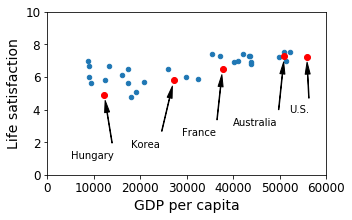

In [57]:
sample_data.plot(kind='scatter', x='GDP per capita',y='Life satisfaction',figsize=(5,3))
plt.axis([0,60000, 0,10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

In [58]:
sample_data.to_csv(os.path.join('datasets','lifesat','lifesat.csv'))

In [59]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


Text(5000,2.6,'$\\theta_1 = 5\\ times 10^{-5}$')

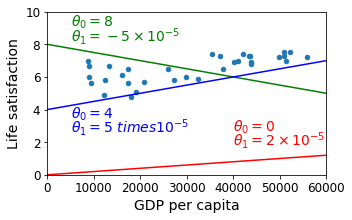

In [68]:
import numpy as np
sample_data.plot(kind='scatter',x='GDP per capita', y='Life satisfaction',figsize=(5,3))
plt.axis([0, 60000, 0,10])
X = np.linspace(0,60000,1000)
plt.plot(X, 2*X/100000, 'r')
plt.text(40000, 2.7, r'$\theta_0 =0$', fontsize=14, color='r')
plt.text(40000, 1.8, r'$\theta_1 =2 \times 10^{-5}$',fontsize=14,color='r')
plt.plot(X, 8- 5*X/100000, 'g')
plt.text(5000,9.1, r'$\theta_0 = 8$',fontsize=14,color='g')
plt.text(5000, 8.2, r'$\theta_1 = -5 \times 10^{-5}$', fontsize=14,color='g')
plt.plot(X, 4+ 5*X/100000, 'b')
plt.text(5000, 3.5, r'$\theta_0 =4$',fontsize=14,color='b')
plt.text(5000, 2.6, r'$\theta_1 = 5\ times 10^{-5}$', fontsize=14,color='b')

In [76]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data['GDP per capita']]
ysample = np.c_[sample_data['Life satisfaction']]
lin1.fit(Xsample, ysample)
t0,t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0,t1

(5.763029861307918, 2.317733704739607e-05)

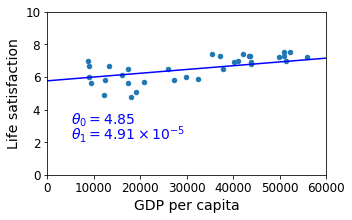

In [82]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

In [84]:
cyprus_gdp_per_capita = gdp_per_capita.loc['Cyprus']['GDP per capita']
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict(cyprus_gdp_per_capita)[0][0]
cyprus_predicted_life_satisfaction

22587.49


6.2865477300926065

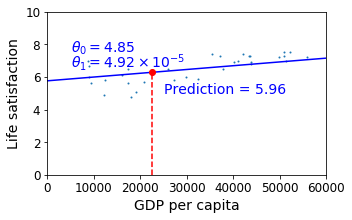

In [93]:
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction',figsize=(5,3),s=1)
X = np.linspace(0, 60000, 1000)
plt.plot(X, t0 +t1 *X, 'b')
plt.axis([0,60000,0,10])
plt.text(5000, 7.5, r'$\theta_0 = 4.85$',fontsize=14, color='b')
plt.text(5000, 6.6, r'$\theta_1 = 4.92 \times 10^{-5}$',fontsize=14, color='b')
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],[0,cyprus_predicted_life_satisfaction],'r--')
plt.text(25000, 5.0, r'Prediction = 5.96', fontsize=14,color='b')
plt.plot(cyprus_gdp_per_capita,cyprus_predicted_life_satisfaction,'ro')
plt.show()

In [94]:
sample_data[7:10]

,GDP per capita,Life satisfaction
Country,,
Slovak Republic,15991.736,6.1
Czech Republic,17256.918,6.5
Estonia,17288.083,5.6


In [95]:
(5.1 + 5.7 +6.5) /3

5.766666666666667

In [ ]:
backup = oecd_bli, gdp_per_capita
